# Using Pre-Trained Dectron2

In [14]:
import cv2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import  Visualizer
from detectron2.data import MetadataCatalog

In [15]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.DEVICE = 'cpu'

In [16]:
predictor = DefaultPredictor(cfg)

(408, 612, 3)


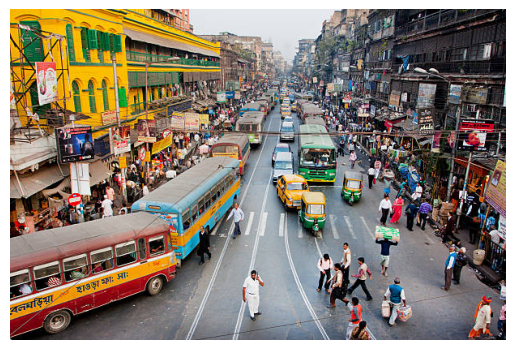

In [26]:
# path = "./German-Shepherd-dog-Alsatian.webp"
path = "assets/indian_road.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape) # Image Shape

plt.axis("off")
plt.imshow(img)     

In [32]:
output = predictor(img)

/Users/akhilsharma/.local/share/virtualenvs/computervision-keras-UtGWNFWe/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [33]:
output

{'instances': Instances(num_instances=33, image_height=408, image_width=612, fields=[pred_boxes: Boxes(tensor([[  0.8550, 250.6255, 203.2671, 403.4295],
         [287.3446, 321.0275, 314.0329, 383.7320],
         [354.0874, 140.3159, 401.8065, 216.3463],
         [148.5836, 178.7996, 285.1326, 314.0677],
         [277.6896, 123.0495, 314.5461, 169.1988],
         [377.1045, 299.5027, 398.4643, 349.1157],
         [271.1204, 239.9339, 288.2860, 282.7487],
         [231.3423, 268.4534, 248.2816, 314.8200],
         [462.6693, 328.8088, 489.9351, 393.9066],
         [390.3266, 313.8549, 418.3287, 370.0000],
         [112.8880, 230.4887, 127.3265, 258.5781],
         [246.8620, 151.3885, 297.2083, 206.6617],
         [415.4666, 305.0739, 448.5086, 360.2357],
         [405.5533, 287.1646, 421.3396, 347.1084],
         [475.4287, 364.2890, 497.1467, 387.2381],
         [455.2934, 227.7274, 471.6003, 267.4575],
         [418.4285, 173.3914, 427.4769, 197.1940],
         [563.9650, 351.9433, 5

In [34]:
mask = output["instances"].pred_masks.numpy()

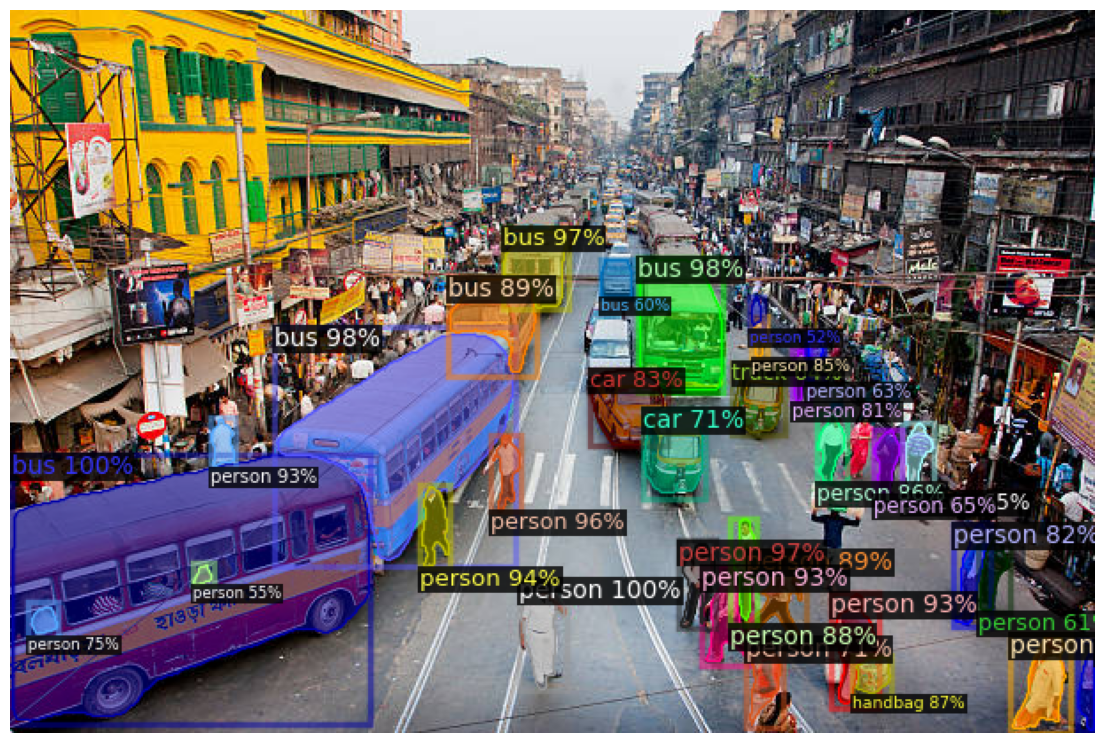

In [35]:
v = Visualizer(img, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(output["instances"])

plt.figure(figsize=(14, 10))
plt.imshow(out.get_image())
plt.axis('off')


plt.show()

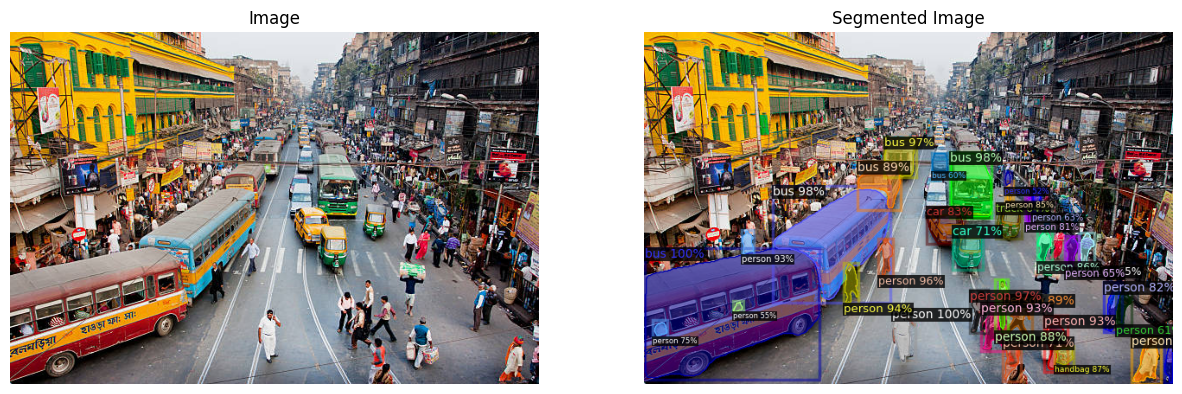

<Figure size 640x480 with 0 Axes>

In [37]:
f = plt.figure(figsize=(15, 7))

f.add_subplot(1,2, 1)
plt.title("Image")
plt.axis('off')
plt.imshow(img)

f.add_subplot(1,2, 2)
plt.title("Segmented Image")
plt.axis('off')
plt.imshow(out.get_image())

plt.show(block=True)
plt.savefig('assets/bus.png')